In [ ]:
# TASK-1 - STOCK MARKET PREDICTION

# Author: Gopal Krishna

# Batch: July

# Domain: Data Science

# Aim: Build a model that predicts the stock market analysis.

*Importing important Libraries*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

*Importing DATASET*

In [106]:
stock_data = pd.read_csv("/content/infolimpioavanzadoTarget.csv")
stock_data.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [108]:
stock_data.shape

(7781, 1285)

In [107]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


*Plotting the True Adjusted Close Value*

<Axes: >

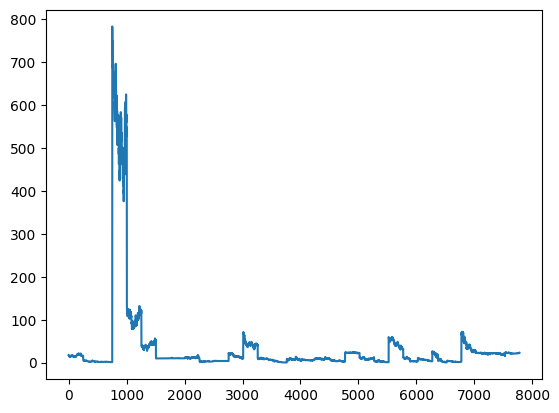

In [114]:
stock_data['adjclose'].plot()

In [ ]:
stock_data['date']=pd.to_datetime(stock_data['date'])

In [ ]:
print(f'Dataframe contains stock prices between {stock_data.date.min()} {stock_data.date.max()}')
print(f'Total Days = {(stock_data.date.max() - stock_data.date.min()).days}days')

Dataframe contains stock prices between 2022-01-03 00:00:00 2022-12-30 00:00:00
Total Days = 361days


*Setting the Target Variable and Selecting the Features*

In [122]:
#Set Target Variable
output_var = pd.DataFrame(stock_data['adjclose'])
#Selecting the Features
features = [ 'open', 'high', 'low', 'close', 'volume']


*Scaling*

In [123]:
#Scaling
from sklearn.preprocessing import MinMaxScaler # Fixed typo in module name
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(stock_data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=stock_data.index)
feature_transform.head()

,open,high,low,close,volume
0,0.021865,0.022260,0.021789,0.021769,0.000660
1,0.021739,0.022374,0.021942,0.021644,0.000797
2,0.021589,0.021735,0.021037,0.020753,0.000638
3,0.020419,0.020584,0.020056,0.019775,0.001075
4,0.019879,0.019845,0.019406,0.019198,0.000853


 *Creating a Training Set and a Test Set for Stock Market Prediction*

In [125]:
#Splitting to Training set and Test set
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

*Data Processing For LSTM*

In [126]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

 *Building the LSTM Model for Stock Market Prediction*

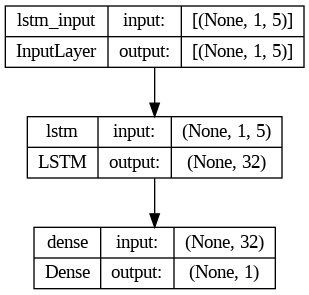

In [137]:
#Building the LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.utils import plot_model # Import plot_model from the correct module

lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

*Training the Stock Market Prediction Model*

In [138]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
885/885 [==============================] - 4s 2ms/step - loss: 11918.9346
Epoch 2/100
885/885 [==============================] - 2s 2ms/step - loss: 11649.6729
Epoch 3/100
885/885 [==============================] - 3s 3ms/step - loss: 11196.5879
Epoch 4/100
885/885 [==============================] - 3s 4ms/step - loss: 10556.2314
Epoch 5/100
885/885 [==============================] - 2s 2ms/step - loss: 9855.0244
Epoch 6/100
885/885 [==============================] - 2s 2ms/step - loss: 9170.4551
Epoch 7/100
885/885 [==============================] - 2s 2ms/step - loss: 8519.5342
Epoch 8/100
885/885 [==============================] - 2s 2ms/step - loss: 7870.2476
Epoch 9/100
885/885 [==============================] - 3s 4ms/step - loss: 7198.1875
Epoch 10/100
885/885 [==============================] - 3s 3ms/step - loss: 6491.2705
Epoch 11/100
885/885 [==============================] - 2s 2ms/step - loss: 5760.3867
Epoch 12/100
885/885 [==============================] - 2s 

*Making the LSTM Prediction*

In [139]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

23/23 [==============================] - 0s 2ms/step


*Comparing Predicted vs True Adjusted Close Value – LSTM*

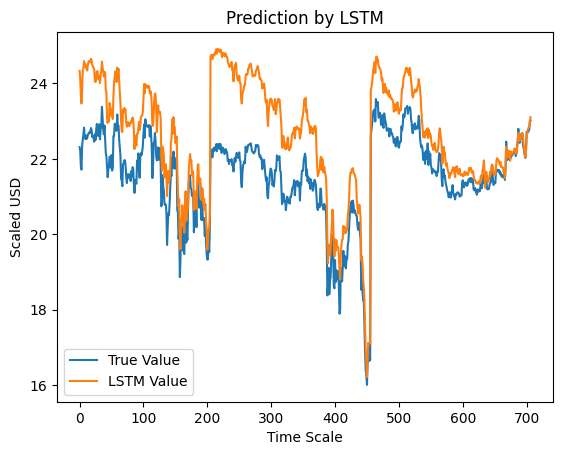

In [140]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()